<a href="https://colab.research.google.com/github/21B030702/DM_Labs/blob/main/DM_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ex1
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

# 1. Загрузка данных iris
iris = load_iris()
X, y = iris.data, iris.target

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Выбор двух лучших признаков с использованием chi2
select_k_best = SelectKBest(chi2, k=2)
X_train_selected = select_k_best.fit_transform(X_train, y_train)

# 4. Вывод выбранных признаков
print("Выбранные признаки:", iris.feature_names[:2])

Выбранные признаки: ['sepal length (cm)', 'sepal width (cm)']


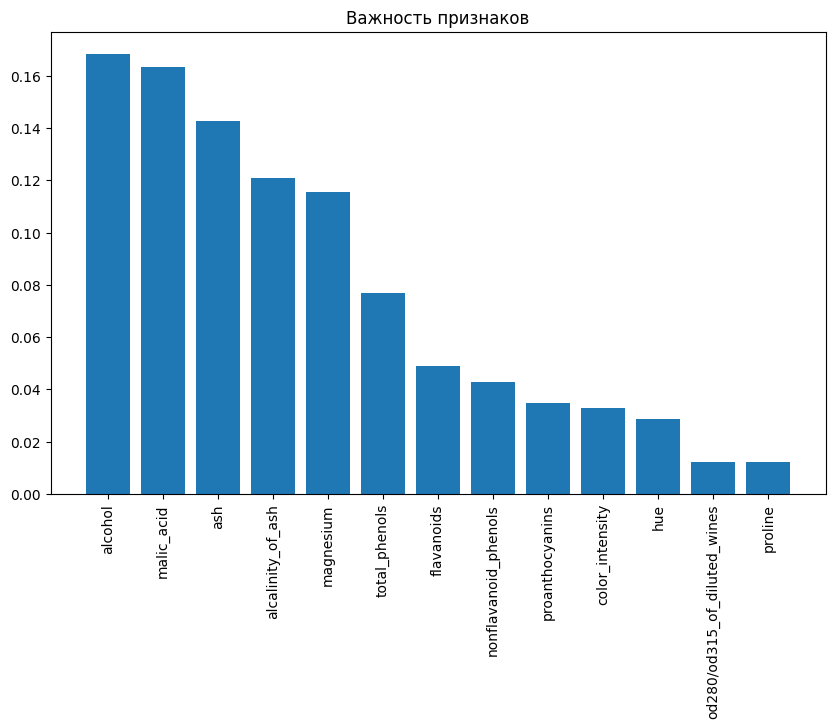

In [ ]:
#Ex2
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Загрузка данных Wine
wine = load_wine()
X, y = wine.data, wine.target

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Обучение Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 4. Важность признаков
importances = model.feature_importances_
indices = importances.argsort()[::-1]

# Визуализация
plt.figure(figsize=(10, 6))
plt.title("Важность признаков")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), wine.feature_names, rotation=90)
plt.show()

In [ ]:
#Ex3
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1. Загрузка данных Breast Cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Использование RFE с SVM
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=5)
rfe.fit(X_train, y_train)

# 4. Вывод отобранных признаков
print("Отобранные признаки:", cancer.feature_names[rfe.support_])

Отобранные признаки: ['mean concave points' 'radius error' 'worst concavity'
 'worst concave points' 'worst symmetry']


In [ ]:
#Ex4
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# 1. Загрузка данных Diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Применение Lasso (L1-регуляризация)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# 4. Важность признаков
print("Коэффициенты:", lasso.coef_)

Коэффициенты: [   0.         -173.27107577  558.93812468  339.35373951  -58.72068535
   -0.         -274.11351588    0.          372.83897776   25.58680152]


In [ ]:
#Ex5
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Загрузка данных Iris
iris = load_iris()
X, y = iris.data, iris.target

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Обучение Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# 4. Оценка модели
y_pred = logreg.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))

Точность: 1.0
Матрица ошибок:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
#Ex6
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Загрузка данных Breast Cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Обучение SVM
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# 4. Оценка модели
y_pred = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred)

print("Точность:", accuracy_svm)
print("Матрица ошибок:\n", conf_matrix_svm)

Точность: 0.9649122807017544
Матрица ошибок:
 [[ 59   4]
 [  2 106]]


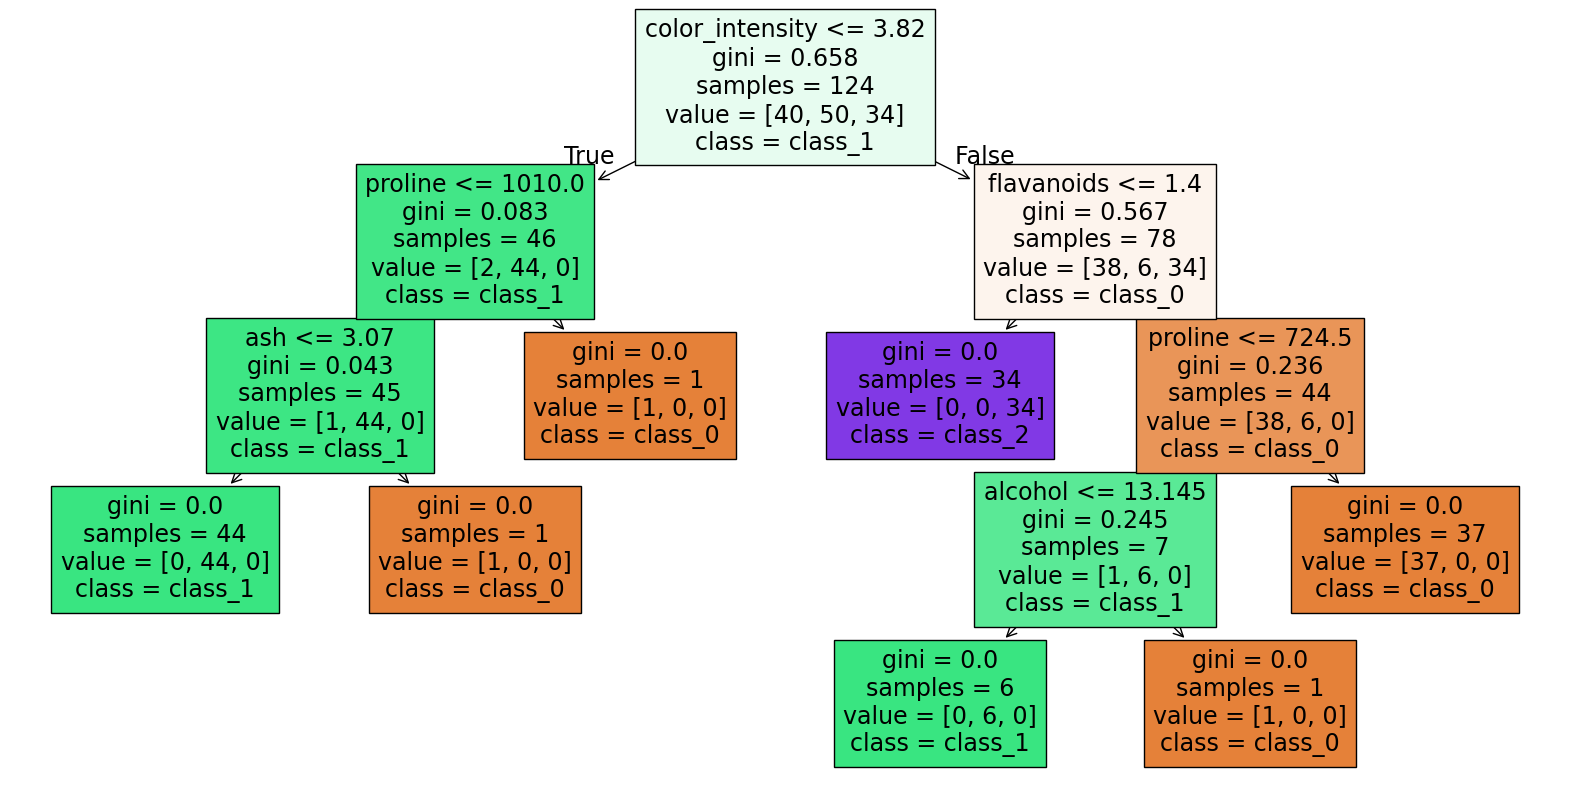

In [ ]:
#Ex7
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных Wine
wine = load_wine()
X, y = wine.data, wine.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

In [ ]:
#Ex8
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Загрузка Ames Housing dataset
housing = fetch_openml(name="house_prices", as_frame=True)
X, y = housing.data.select_dtypes(include=['float64', 'int64']).drop(columns=['Id']), housing.target

# Обработка пропущенных значений с использованием SimpleImputer
imputer = SimpleImputer(strategy="mean")  # Можно также использовать "median" или "most_frequent"
X_imputed = imputer.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Обучение модели линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)

# Предсказания и оценка
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1242620882.8218546
R-squared: 0.821925453369863


In [ ]:
#Ex9
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"R-squared (Ridge): {r2_ridge}")


Mean Squared Error (Ridge): 3112.9664151980814
R-squared (Ridge): 0.4233440269603015


In [ ]:
#Ex10
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)

# Предсказания и оценка
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5305677824766757
R-squared: 0.595770232606166
